In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score)
from sklearn.metrics import average_precision_score
import pandas as pd

In [2]:
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE

In [3]:
import seaborn as sns

In [4]:
######### Warning ##############
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
########## Sklearn #############
# Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
# Models
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.naive_bayes import GaussianNB              # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier      # KNN
from sklearn.svm import SVC                             # SVC
from sklearn import tree                                # CART - Sınıflandırma ve Regresyon Ağaçları
from sklearn.tree import DecisionTreeClassifier         # CART - Sınıflandırma ve Regresyon Ağaçları
from sklearn.ensemble import BaggingClassifier          # Bagging
from sklearn.ensemble import VotingClassifier           # Voting
from sklearn.ensemble import RandomForestClassifier     # Random Forest
from sklearn.ensemble import AdaBoostClassifier         # Ada Boost
from sklearn.ensemble import GradientBoostingClassifier # GBM - Gradient Boosting Machine


In [6]:
import pandas as pd
import numpy as np
import sys, os , warnings
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler ,MinMaxScaler,RobustScaler, PowerTransformer, normalize
warnings.filterwarnings('ignore')

In [7]:
dataset_csv_path = './archive'
csv_file_names = ['Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', 
                  'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 
                  'Friday-WorkingHours-Morning.pcap_ISCX.csv', 
                  'Monday-WorkingHours.pcap_ISCX.csv', 
                  'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', 
                  'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', 
                  'Tuesday-WorkingHours.pcap_ISCX.csv', 
                  'Wednesday-workingHours.pcap_ISCX.csv']

complete_paths = []
for csv_file_name in csv_file_names:
    complete_paths.append(os.path.join(dataset_csv_path, csv_file_name))

In [8]:
complete_paths

['./archive\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 './archive\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 './archive\\Friday-WorkingHours-Morning.pcap_ISCX.csv',
 './archive\\Monday-WorkingHours.pcap_ISCX.csv',
 './archive\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 './archive\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 './archive\\Tuesday-WorkingHours.pcap_ISCX.csv',
 './archive\\Wednesday-workingHours.pcap_ISCX.csv']

In [9]:


df = pd.concat(map(pd.read_csv, complete_paths), 
               ignore_index = True)

In [10]:
df.shape

(2830743, 79)

In [12]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [13]:
# Remove the space before each feature names
df.columns = df.columns.str.strip()
print('dataset shape', df.shape)

dataset shape (2830743, 79)


In [14]:
df['Label'].value_counts()

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [15]:
print(df.select_dtypes(include = np.number).columns)
print(df.select_dtypes(include = np.number).columns.shape)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [16]:
print(df.select_dtypes(exclude = np.number).columns)
print(df.select_dtypes(exclude = np.number).columns.shape)

Index(['Label'], dtype='object')
(1,)


In [17]:
#using function:
def get_contant_featues(X,data_cols,threshold=0.98):
    result = []
    for col in data_cols:
        val, counts = np.unique(X[col],return_counts=True)
        v = counts[0]/counts.sum()
        if v > threshold:
            result.append(col)

    return result

In [18]:
data_cols = df.select_dtypes(include = np.number).columns
static_features = get_contant_featues(df,data_cols,threshold=0.99)

In [19]:
df.drop(static_features,axis =1, inplace = True)

In [20]:
df.shape

(2830743, 67)

In [21]:
df.shape

(2830743, 67)

In [22]:
# find duplicate rows
# Drop duplicate rows
df.drop_duplicates(inplace = True)
print('shape after dropping duplicates:', df.shape)

shape after dropping duplicates: (2522362, 67)


In [23]:
df.replace([np.inf, -np.inf], np.nan, inplace = True)
print(df.isna().any(axis = 1).sum(), 'rows dropped')
df.dropna(inplace = True)
print('shape after removing nan:', df.shape)

1564 rows dropped
shape after removing nan: (2520798, 67)


In [ ]:
df['Label'].value_counts()

In [23]:
df['Label'] = np.where(df['Label'] == 'BENIGN', 0, 1)

In [24]:
df['Label'].value_counts()

Label
0    2095057
1     425741
Name: count, dtype: int64

Train data length: 2520798


Text(0.5, 0, '')

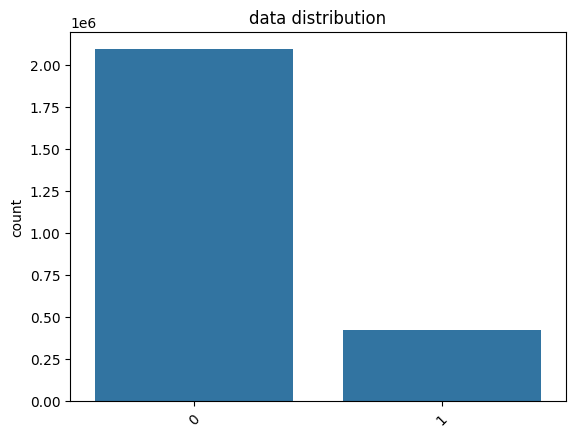

In [53]:
print(f"Train data length: {len(df)}")
# Visualise the distribution of attacks and normal traffic


# Create the plots
sns.countplot(x="Label", data=df)

# Set the plot titles
plt.title("data distribution")

# Rotate xticks for readability
plt.tick_params('x', labelrotation=45)


# Change the xtick labels for attack / normal
#plt.xticklabels(["Normal", "Attack"])


# Remove xlabels
plt.xlabel("")


# Add some space between the plots for y labels
#plt.subplots_adjust(wspace=0.25)

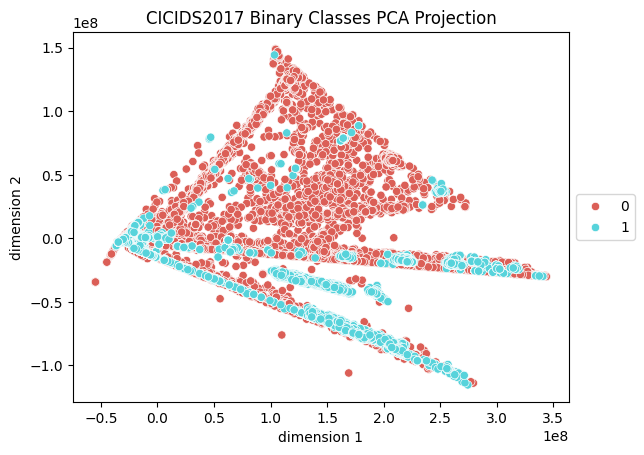

In [57]:
#PCA visualization

# https://stackoverflow.com/questions/43640952/how-to-subsample-a-pandas-dataframe-respecting-the-frequency-of-each-class
subsample_df = df.groupby('Label').apply(pd.DataFrame.sample, frac = 0.1).reset_index(drop = True)

X = subsample_df.drop(['Label'], axis = 1)
y = subsample_df['Label']

pca = PCA(n_components = 2, random_state = 0)
z = pca.fit_transform(X) 

pca_15_df = pd.DataFrame()
pca_15_df['Label'] = y
pca_15_df['dimension 1'] = z[:, 0]
pca_15_df['dimension 2'] = z[:, 1]

sns.scatterplot(x = 'dimension 1', y = 'dimension 2', 
                hue = pca_15_df.Label,
                palette = sns.color_palette('hls', len(pca_15_df.Label.value_counts())),
                data = pca_15_df).set(title = 'CICIDS2017 Binary Classes PCA Projection')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5)) 
plt.show()

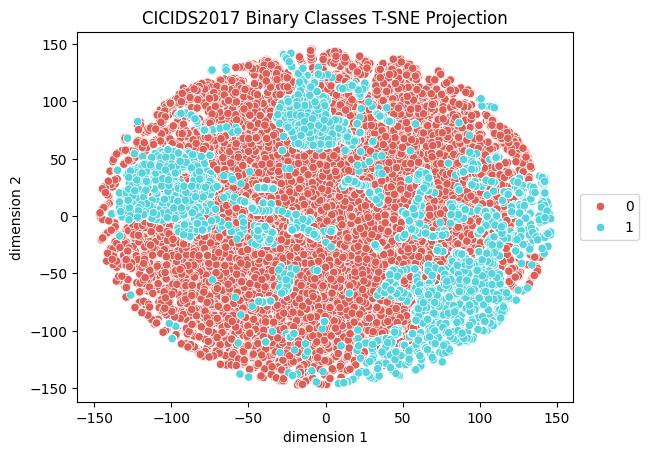

In [62]:
#TSNE visualization

#%%time
X = subsample_df.drop(['Label'], axis = 1)
y = subsample_df['Label']

tsne = TSNE(n_components = 2, n_jobs = -1, verbose = 0, random_state = 0)
z = tsne.fit_transform(X) 

tsne_15_df = pd.DataFrame()
tsne_15_df['Label'] = y
tsne_15_df['dimension 1'] = z[:, 0]
tsne_15_df['dimension 2'] = z[:, 1]

sns.scatterplot(x = 'dimension 1', y = 'dimension 2', 
                hue = tsne_15_df.Label,
                palette = sns.color_palette('hls', len(tsne_15_df.Label.value_counts())),
                data = tsne_15_df).set(title = 'CICIDS2017 Binary Classes T-SNE Projection')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5)) 
plt.show()

In [21]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [25]:
#train - test split:
Y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Label']),
                                                    Y,
                                                    test_size = 0.3, 
                                                    shuffle = True, 
                                                    stratify = Y, 
                                                    random_state = 0)

In [26]:
X_train.shape

(1764558, 66)

In [27]:
y_train.value_counts()

Label
0    1466539
1     298019
Name: count, dtype: int64

In [28]:
train  = pd.concat([X_train,y_train], axis = 1)

In [29]:
X_train = None 
y_train = None # free space

In [30]:
train.shape

(1764558, 67)

In [ ]:
#Feature Importance 

In [ ]:
#Colleration:

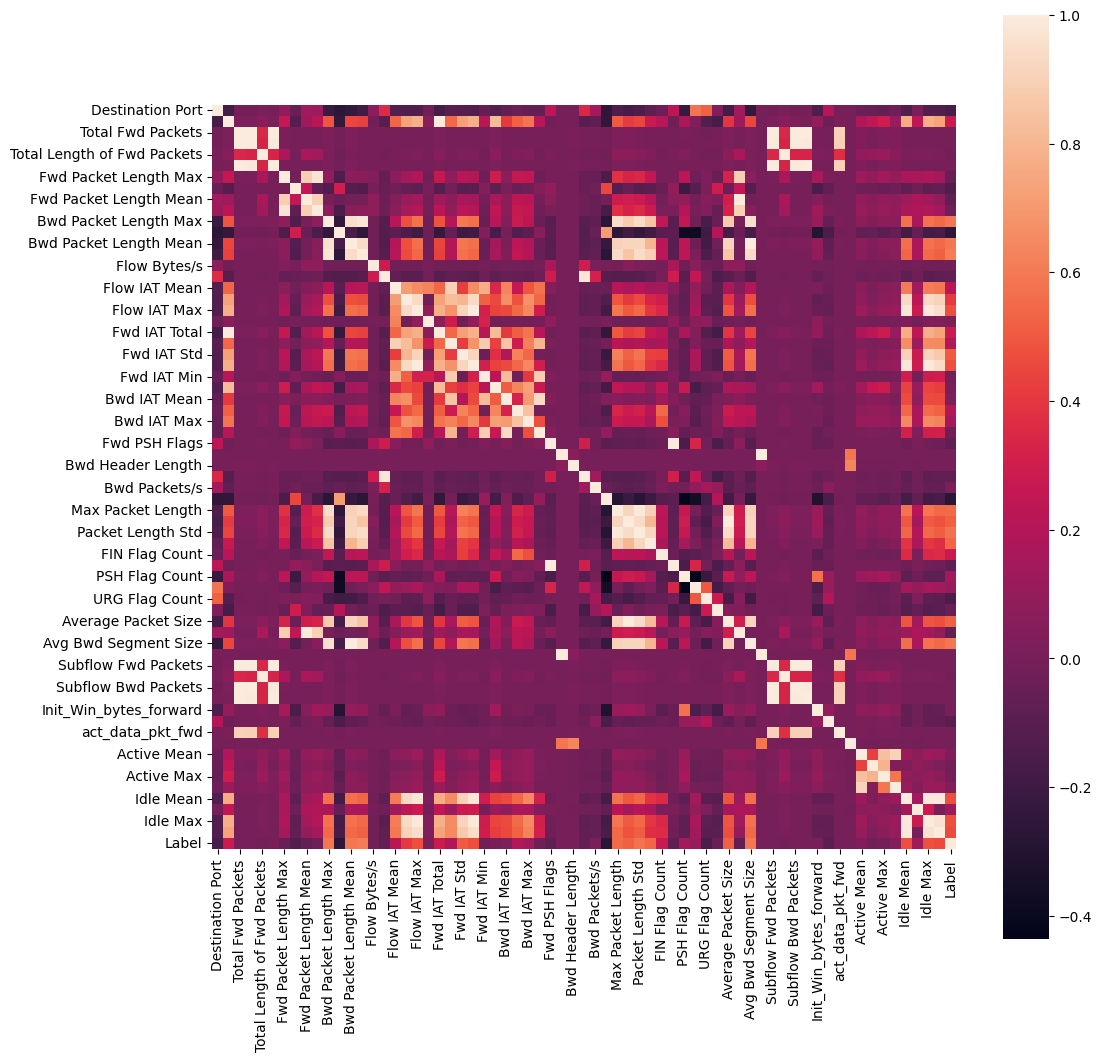

In [72]:
method = "pearson"
# correlation matrix
numerical_feauters = train.select_dtypes(include= np.number).columns
corr_mat = train[numerical_feauters].corr(method=method)

plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, square=True)
plt.show()

In [73]:
corr_matrix = train[numerical_feauters].corr().abs()
corr_matrix

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Destination Port,1.000000,0.171668,0.004739,0.004445,0.008399,0.003476,0.091073,0.047883,0.136763,0.123103,...,0.001044,0.040234,0.048040,0.057784,0.026815,0.127966,0.006732,0.123651,0.129522,0.159595
Flow Duration,0.171668,1.000000,0.020732,0.019576,0.057260,0.016127,0.263688,0.115861,0.134231,0.224810,...,0.001330,0.183930,0.237883,0.288980,0.116493,0.764423,0.240577,0.776067,0.734398,0.278783
Total Fwd Packets,0.004739,0.020732,1.000000,0.998823,0.339258,0.996355,0.008897,0.003327,0.000316,0.001054,...,0.000223,0.029903,0.008356,0.024187,0.029990,0.001277,0.000664,0.001361,0.001142,0.003172
Total Backward Packets,0.004445,0.019576,0.998823,1.000000,0.331913,0.992988,0.008615,0.002909,0.000678,0.000690,...,0.000024,0.028934,0.006439,0.022318,0.029990,0.000899,0.000354,0.000927,0.000818,0.003286
Total Length of Fwd Packets,0.008399,0.057260,0.339258,0.331913,1.000000,0.327971,0.174684,0.001181,0.164973,0.141421,...,0.001261,0.088956,0.098511,0.116463,0.057333,0.018371,0.023941,0.021522,0.014747,0.013769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,0.127966,0.764423,0.001277,0.000899,0.018371,0.000392,0.171326,0.078580,0.119688,0.174042,...,0.000789,0.114437,0.032154,0.082642,0.113316,1.000000,0.146845,0.990225,0.990066,0.470217
Idle Std,0.006732,0.240577,0.000664,0.000354,0.023941,0.000008,0.175418,0.032409,0.176569,0.188359,...,0.004294,0.068029,0.079644,0.067596,0.036266,0.146845,1.000000,0.281124,0.007106,0.128870
Idle Max,0.123651,0.776067,0.001361,0.000927,0.021522,0.000378,0.189878,0.080876,0.140322,0.194298,...,0.001404,0.126849,0.050924,0.096510,0.117710,0.990225,0.281124,1.000000,0.961202,0.474971
Idle Min,0.129522,0.734398,0.001142,0.000818,0.014747,0.000386,0.147193,0.074334,0.095856,0.148643,...,0.000167,0.104327,0.019231,0.071153,0.108230,0.990066,0.007106,0.961202,1.000000,0.457791


In [74]:
#there is highly correlation between some feauters.
# Getting and printing high correlated features
limit = 0.9

columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")

Flow Duration        Fwd IAT Total        0.9985187560406988
Total Fwd Packets    Total Backward Packets 0.9988234399883777
Total Fwd Packets    Total Length of Bwd Packets 0.996355043400269
Total Fwd Packets    Subflow Fwd Packets  1.0
Total Fwd Packets    Subflow Bwd Packets  0.9988234399883777
Total Fwd Packets    Subflow Bwd Bytes    0.9963455829086517
Total Fwd Packets    act_data_pkt_fwd     0.9032670195581566
Total Backward Packets Total Length of Bwd Packets 0.9929883619808719
Total Backward Packets Subflow Fwd Packets  0.9988234399883777
Total Backward Packets Subflow Bwd Packets  1.0
Total Backward Packets Subflow Bwd Bytes    0.9929796201593725
Total Length of Fwd Packets Subflow Fwd Bytes    0.9999994117802622
Total Length of Bwd Packets Subflow Fwd Packets  0.996355043400269
Total Length of Bwd Packets Subflow Bwd Packets  0.9929883619808719
Total Length of Bwd Packets Subflow Bwd Bytes    0.9999998377683182
Total Length of Bwd Packets act_data_pkt_fwd     0.90373076067432

In [95]:
# Selecting all the features with high correlation values with other features
# Refer: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

numerical_feauters = train.select_dtypes(include= np.number).columns
#corr_mat = train[numerical_feauters].corr(method=method)

corr_matrix = train[numerical_feauters].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

In [96]:
to_drop

['Total Backward Packets',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow IAT Max',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd Packets/s',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'SYN Flag Count',
 'Average Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Fwd Header Length.1',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Bwd Bytes',
 'act_data_pkt_fwd',
 'Active Max',
 'Active Min',
 'Idle Mean',
 'Idle Max',
 'Idle Min']

In [97]:
len(to_drop)

36

In [ ]:
#method 2

In [78]:
#let's try additional (on the top of colleration)
import mrmr
from mrmr import mrmr_classif

In [82]:

X_ = train.drop(['Label'],axis = 1)
y_ = train['Label']

# select top 10 features using mRMR
selected_features = mrmr_classif(X=X_, y=y_, K=35)

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [39:01<00:00, 66.90s/it]


In [83]:
selected_features

['Bwd Packet Length Std',
 'ACK Flag Count',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Max',
 'Fwd Packet Length Mean',
 'Avg Bwd Segment Size',
 'Fwd IAT Std',
 'Packet Length Std',
 'Packet Length Variance',
 'Max Packet Length',
 'Idle Max',
 'Average Packet Size',
 'Idle Mean',
 'Packet Length Mean',
 'Flow IAT Max',
 'Fwd IAT Max',
 'Idle Min',
 'Min Packet Length',
 'Flow IAT Std',
 'Bwd Packet Length Min',
 'FIN Flag Count',
 'Fwd IAT Total',
 'Flow Duration',
 'Flow IAT Mean',
 'URG Flag Count',
 'Fwd Packet Length Min',
 'Destination Port',
 'Bwd IAT Std',
 'Fwd IAT Mean',
 'Init_Win_bytes_backward',
 'PSH Flag Count',
 'Idle Std',
 'Fwd PSH Flags',
 'SYN Flag Count',
 'Bwd IAT Max']

In [85]:
len(selected_features)

35

In [87]:
features_names = train.drop(['Label'],axis = 1).columns

In [88]:
additional_drop = list(set(features_names) - set(selected_features))

In [89]:
additional_drop

['Total Backward Packets',
 'Avg Fwd Segment Size',
 'min_seg_size_forward',
 'Init_Win_bytes_forward',
 'Active Min',
 'Total Fwd Packets',
 'Fwd Packet Length Std',
 'Flow IAT Min',
 'Fwd Header Length',
 'Fwd IAT Min',
 'Active Std',
 'Active Max',
 'Flow Packets/s',
 'Active Mean',
 'Bwd IAT Mean',
 'Fwd Packets/s',
 'Bwd Header Length',
 'Fwd Header Length.1',
 'Subflow Fwd Packets',
 'Subflow Bwd Packets',
 'Bwd IAT Min',
 'Down/Up Ratio',
 'Subflow Bwd Bytes',
 'Total Length of Bwd Packets',
 'Bwd Packets/s',
 'Fwd Packet Length Max',
 'Flow Bytes/s',
 'act_data_pkt_fwd',
 'Bwd IAT Total',
 'Subflow Fwd Bytes',
 'Total Length of Fwd Packets']

In [87]:
additional_drop = ['Total Backward Packets',
 'Avg Fwd Segment Size',
 'min_seg_size_forward',
 'Init_Win_bytes_forward',
 'Active Min',
 'Total Fwd Packets',
 'Fwd Packet Length Std',
 'Flow IAT Min',
 'Fwd Header Length',
 'Fwd IAT Min',
 'Active Std',
 'Active Max',
 'Flow Packets/s',
 'Active Mean',
 'Bwd IAT Mean',
 'Fwd Packets/s',
 'Bwd Header Length',
 'Fwd Header Length.1',
 'Subflow Fwd Packets',
 'Subflow Bwd Packets',
 'Bwd IAT Min',
 'Down/Up Ratio',
 'Subflow Bwd Bytes',
 'Total Length of Bwd Packets',
 'Bwd Packets/s',
 'Fwd Packet Length Max',
 'Flow Bytes/s',
 'act_data_pkt_fwd',
 'Bwd IAT Total',
 'Subflow Fwd Bytes',
 'Total Length of Fwd Packets']

In [88]:
len(additional_drop)

31

In [ ]:
pca = PCA()
pca.fit(x_scaled)  # X_train is your training data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [31]:

X_ = train.drop(['Label'],axis = 1)
y_ = train['Label']

In [ ]:
#X_train, X_test, y_train, y_test 

In [ ]:
#method 5:

In [32]:
# Optional: Standardize features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_)
X_test_scaled = scaler.transform(X_test)

In [49]:
additional_drop = ['Total Backward Packets',
 'Avg Fwd Segment Size',
 'min_seg_size_forward',
 'Init_Win_bytes_forward',
 'Active Min',
 'Total Fwd Packets',
 'Fwd Packet Length Std',
 'Flow IAT Min',
 'Fwd Header Length',
 'Fwd IAT Min',
 'Active Std',
 'Active Max',
 'Flow Packets/s',
 'Active Mean',
 'Bwd IAT Mean',
 'Fwd Packets/s',
 'Bwd Header Length',
 'Fwd Header Length.1',
 'Subflow Fwd Packets',
 'Subflow Bwd Packets',
 'Bwd IAT Min',
 'Down/Up Ratio',
 'Subflow Bwd Bytes',
 'Total Length of Bwd Packets',
 'Bwd Packets/s',
 'Fwd Packet Length Max',
 'Flow Bytes/s',
 'act_data_pkt_fwd',
 'Bwd IAT Total',
 'Subflow Fwd Bytes',
 'Total Length of Fwd Packets']

In [50]:
len(droppedUsingRf), len(additional_drop)

(36, 31)

In [53]:
comm_dropped = []
for feature in additional_drop:
    if feature in droppedUsingRf:
        comm_dropped.append(feature)

comm_dropped

['Total Backward Packets',
 'Avg Fwd Segment Size',
 'Init_Win_bytes_forward',
 'Active Min',
 'Fwd Packet Length Std',
 'Flow IAT Min',
 'Fwd IAT Min',
 'Active Std',
 'Active Max',
 'Flow Packets/s',
 'Active Mean',
 'Bwd IAT Mean',
 'Fwd Packets/s',
 'Subflow Bwd Packets',
 'Bwd IAT Min',
 'Down/Up Ratio',
 'Flow Bytes/s',
 'Bwd IAT Total']

In [55]:
len(comm_dropped)

18

In [68]:
train.shape

(1764558, 67)

In [69]:
train.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
678532,53,954919,1,1,38,59,38,38,38.000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2072761,53,30797,2,2,90,90,45,45,45.000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
284482,53,118858,1,1,52,179,52,52,52.000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
502544,58806,3,2,0,12,0,6,6,6.000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2167113,80,103000198,8,4,709,0,231,0,88.625,117.944221,...,32,3000599.0,0.0,3000599,3000599,100000000.0,0.0,100000000,100000000,1


In [116]:
X_ = train.drop(['Label'],axis = 1)
y_ = train['Label']

In [117]:
#method 6:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2, f_classif

In [118]:

scaler = MinMaxScaler(feature_range=(0, 1))
X_ = scaler.fit_transform(X_)

In [119]:
FeatureSelection = SelectPercentile(score_func = chi2, percentile = 50)
X = FeatureSelection.fit_transform(X_,y_)

In [120]:
print('Selected Features are: ', FeatureSelection.get_support())

Selected Features are:  [ True  True False False False False False False False False  True  True
  True  True False False  True  True  True False  True  True  True  True
 False False False  True  True False  True False False False False  True
  True  True  True  True  True  True  True  True  True False  True False
  True False False False False False False  True False False False False
 False False  True  True  True  True]


In [121]:
selected_from_precentile = train.drop(['Label'],axis = 1).columns[FeatureSelection.get_support()]
selected_from_precentile

Index(['Destination Port', 'Flow Duration', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'Average Packet Size', 'Avg Bwd Segment Size',
       'Init_Win_bytes_backward', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min'],
      dtype='object')

In [122]:
len(selected_from_precentile)

33

In [123]:
droppedUsingPrecentile = list(set(features_names) - set(selected_from_precentile))
droppedUsingPrecentile

['Fwd Packet Length Min',
 'Fwd Packets/s',
 'Total Fwd Packets',
 'Bwd IAT Total',
 'Bwd IAT Min',
 'Flow IAT Min',
 'Active Min',
 'Subflow Bwd Packets',
 'Active Mean',
 'Total Backward Packets',
 'Init_Win_bytes_forward',
 'Avg Fwd Segment Size',
 'Total Length of Bwd Packets',
 'Subflow Fwd Packets',
 'Active Std',
 'Flow Packets/s',
 'Down/Up Ratio',
 'Fwd IAT Min',
 'Fwd Packet Length Std',
 'Total Length of Fwd Packets',
 'act_data_pkt_fwd',
 'Active Max',
 'Fwd Packet Length Max',
 'Fwd Header Length',
 'Bwd IAT Mean',
 'Subflow Fwd Bytes',
 'min_seg_size_forward',
 'Fwd Packet Length Mean',
 'Subflow Bwd Bytes',
 'Bwd Header Length',
 'Bwd Packets/s',
 'Flow Bytes/s',
 'Fwd Header Length.1']

In [124]:
len(droppedUsingPrecentile), len(droppedUsingRf)

(33, 36)

In [85]:
comm_dropped_featues = []
for feature in droppedUsingRf:
    if feature in droppedUsingPrecentile:
        comm_dropped_featues.append(feature)

comm_dropped_featues 

['Fwd Packet Length Min',
 'Bwd IAT Total',
 'Bwd IAT Min',
 'Flow IAT Min',
 'Idle Std',
 'Active Min',
 'Subflow Bwd Packets',
 'Active Mean',
 'Total Backward Packets',
 'Init_Win_bytes_forward',
 'Avg Fwd Segment Size',
 'Active Std',
 'Flow Packets/s',
 'Down/Up Ratio',
 'Fwd IAT Min',
 'Bwd Packet Length Min',
 'Fwd Packet Length Std',
 'Fwd PSH Flags',
 'Bwd IAT Max',
 'SYN Flag Count',
 'Min Packet Length',
 'Active Max',
 'Bwd IAT Mean',
 'Fwd Packets/s',
 'Flow Bytes/s']

In [86]:
len(comm_dropped_featues)

25

In [98]:
len(to_drop)

36

In [134]:

to_drop = set(to_drop)
additional_drop = set(additional_drop)
droppedUsingRf = set(droppedUsingRf)
droppedUsingPrecentile = set(droppedUsingPrecentile)

# Find the common elements using set intersection
selected_dropped_features = to_drop | additional_drop  | droppedUsingPrecentile

# Convert back to a list if needed
selected_dropped_features = list(selected_dropped_features)

print("Common elements:", selected_dropped_features)

Common elements: ['Fwd Packet Length Min', 'Bwd IAT Total', 'Bwd IAT Min', 'Packet Length Mean', 'Total Backward Packets', 'Init_Win_bytes_forward', 'Avg Fwd Segment Size', 'Total Length of Bwd Packets', 'Subflow Fwd Packets', 'Active Std', 'Fwd IAT Max', 'Down/Up Ratio', 'Fwd Packet Length Std', 'Total Length of Fwd Packets', 'Packet Length Variance', 'Bwd IAT Max', 'SYN Flag Count', 'act_data_pkt_fwd', 'Avg Bwd Segment Size', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Subflow Fwd Bytes', 'Fwd Packet Length Mean', 'Average Packet Size', 'Fwd Packets/s', 'Flow Bytes/s', 'Fwd Header Length.1', 'Total Fwd Packets', 'Packet Length Std', 'Flow IAT Min', 'Idle Mean', 'Idle Min', 'Active Min', 'Subflow Bwd Packets', 'Active Mean', 'Idle Max', 'Flow IAT Max', 'Flow Packets/s', 'Fwd IAT Min', 'Fwd IAT Std', 'Bwd Packet Length Std', 'Bwd Packet Length Mean', 'Max Packet Length', 'Active Max', 'Fwd IAT Total', 'Fwd Packet Length Max', 'Fwd Header Length', 'min_seg_size_forward', 'Bwd Header Length', 'Subf

In [136]:
selected_dropped_features

['Fwd Packet Length Min',
 'Bwd IAT Total',
 'Bwd IAT Min',
 'Packet Length Mean',
 'Total Backward Packets',
 'Init_Win_bytes_forward',
 'Avg Fwd Segment Size',
 'Total Length of Bwd Packets',
 'Subflow Fwd Packets',
 'Active Std',
 'Fwd IAT Max',
 'Down/Up Ratio',
 'Fwd Packet Length Std',
 'Total Length of Fwd Packets',
 'Packet Length Variance',
 'Bwd IAT Max',
 'SYN Flag Count',
 'act_data_pkt_fwd',
 'Avg Bwd Segment Size',
 'Fwd IAT Mean',
 'Bwd IAT Mean',
 'Subflow Fwd Bytes',
 'Fwd Packet Length Mean',
 'Average Packet Size',
 'Fwd Packets/s',
 'Flow Bytes/s',
 'Fwd Header Length.1',
 'Total Fwd Packets',
 'Packet Length Std',
 'Flow IAT Min',
 'Idle Mean',
 'Idle Min',
 'Active Min',
 'Subflow Bwd Packets',
 'Active Mean',
 'Idle Max',
 'Flow IAT Max',
 'Flow Packets/s',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Bwd Packet Length Std',
 'Bwd Packet Length Mean',
 'Max Packet Length',
 'Active Max',
 'Fwd IAT Total',
 'Fwd Packet Length Max',
 'Fwd Header Length',
 'min_seg_size_forwar

In [135]:
len(selected_dropped_features)

51

In [137]:
df.shape

(2520798, 67)

In [138]:
df.drop(selected_dropped_features,axis = 1, inplace = True)

In [139]:
df.shape

(2520798, 16)

In [140]:
df.head()

,Destination Port,Flow Duration,Bwd Packet Length Max,Bwd Packet Length Min,Flow IAT Mean,Flow IAT Std,Bwd IAT Std,Fwd PSH Flags,Min Packet Length,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Init_Win_bytes_backward,Idle Std,Label
0,22,1266342,976,0,15075.50000,104051.399700,19636.44809,0,0,0,1,0,0,243,0.0,0
1,22,1319353,976,0,15706.58333,104861.870100,21337.26261,0,0,0,1,0,0,243,0.0,0
2,22,160,0,0,160.00000,0.000000,0.00000,0,0,0,0,1,1,243,0.0,0
3,22,1303488,976,0,15896.19512,106554.899000,23962.23892,0,0,0,1,0,0,243,0.0,0
4,35396,77,0,0,38.50000,14.849242,0.00000,0,0,0,0,1,1,290,0.0,0


In [142]:
df['Idle Std'].value_counts()

Idle Std
0.000000e+00    2291555
1.220000e+07       2685
1.880000e+07       1716
1.230000e+07        484
5.940000e+07        358
                 ...   
8.929012e+03          1
3.261998e+03          1
9.232891e+03          1
8.943729e+03          1
6.726216e+03          1
Name: count, Length: 197616, dtype: int64

In [144]:
#let's save this data 
df.to_csv('./cleanedCICIDS2017.csv')

In [ ]:
#check 

In [163]:
df_try  = pd.read_csv('./cleanedCICIDS2017.csv' ,index_col=0)

In [164]:
df_try.shape

(2520798, 16)

In [165]:
df_try.head()

,Destination Port,Flow Duration,Bwd Packet Length Max,Bwd Packet Length Min,Flow IAT Mean,Flow IAT Std,Bwd IAT Std,Fwd PSH Flags,Min Packet Length,FIN Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Init_Win_bytes_backward,Idle Std,Label
0,22,1266342,976,0,15075.50000,104051.399700,19636.44809,0,0,0,1,0,0,243,0.0,0
1,22,1319353,976,0,15706.58333,104861.870100,21337.26261,0,0,0,1,0,0,243,0.0,0
2,22,160,0,0,160.00000,0.000000,0.00000,0,0,0,0,1,1,243,0.0,0
3,22,1303488,976,0,15896.19512,106554.899000,23962.23892,0,0,0,1,0,0,243,0.0,0
4,35396,77,0,0,38.50000,14.849242,0.00000,0,0,0,0,1,1,290,0.0,0


In [ ]:
#the end:
